<a href="https://colab.research.google.com/github/ahmadayoubi404/Deep-Learning/blob/main/5_Malaria_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model

# **Data** **Preparation**

In [7]:
dataset, dataset_info = tfds.load(('malaria'), with_info=True, as_supervised = True, shuffle_files = True, split = ['train'])

In [8]:
for data in dataset[0].take(2):
    print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [9]:
import tensorflow as tf

# Define the dataset
dataset1 = tf.data.Dataset.range(10)
print("Original Dataset:", list(dataset1.as_numpy_iterator()))

# Define the splitting ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate the sizes
dataset_size = len(list(dataset1.as_numpy_iterator()))
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)

# Create the datasets using take() and skip()
train_dataset = dataset1.take(train_size)
print("Train Dataset:", list(train_dataset.as_numpy_iterator()))

val_dataset = dataset1.skip(train_size).take(val_size)
print("Validation Dataset:", list(val_dataset.as_numpy_iterator()))

test_dataset = dataset1.skip(train_size + val_size)
print("Test Dataset:", list(test_dataset.as_numpy_iterator()))


Original Dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Train Dataset: [0, 1, 2, 3, 4, 5, 6, 7]
Validation Dataset: [8]
Test Dataset: [9]


In [10]:
def splits(dataset, train_ratio, val_ratio, test_ratio):
  dataset_size = len(list(dataset.as_numpy_iterator()))
  train_size = int(train_ratio * dataset_size)
  val_size = int(val_ratio * dataset_size)

  train_dataset = dataset.take(train_size)

  val_dataset = dataset.skip(train_size).take(val_size)

  test_dataset = dataset.skip(train_size + val_size)


  return train_dataset, val_dataset, test_dataset

In [11]:
#splitting our dataset
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset[0], train_ratio, val_ratio, test_ratio)

#print(list(dataset[0].as_numpy_iterator()))
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

# **Data Visualization**

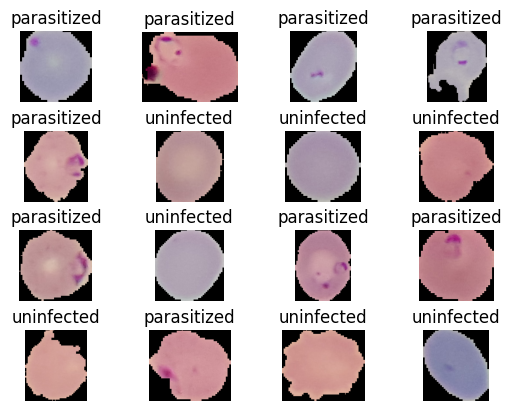

In [14]:
for i, (image, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label)) #label = 0 => uninfected  label = 1 => infected
    plt.axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# **Data Preprocessing**

**Resizing of the input images**


**Normalization**

X = (X - Xmin) / (Xmax - Xmin) = (X - 0)/ (255 - 0)

note: standarization: X = (X - mean) / standard deviation
explore which one is better(depends on the dataset)

In [ ]:
def resize_rescale(image, label):
  image = tf.image.resize(image, (224, 224))/255.0 #here we are normalizing
  return image, label

In [ ]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

# **Convolutional Neural Networks (Sequential API)**

In [ ]:
#note that this architecture is the LeNet-5 architecture from 1989
# model = tf.keras.Sequential([
#       tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
#       tf.keras.layers.Conv2D(filters = 6, kernel_size =5, strides = 1, padding = 'valid', activation = 'sigmoid'),
#       tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

#       tf.keras.layers.Conv2D(filters = 16, kernel_size =5, strides = 1, padding = 'valid', activation = 'sigmoid'),
#       tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

#       tf.keras.layers.Flatten(),

#       tf.keras.layers.Dense(100, activation='sigmoid'),
#       tf.keras.layers.Dense(10, activation='sigmoid'),
#       tf.keras.layers.Dense(1, activation='sigmoid')
#   ])
# model.summary()

#optimizing LeNet
model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
      tf.keras.layers.Conv2D(filters = 6, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

      tf.keras.layers.Conv2D(filters = 16, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

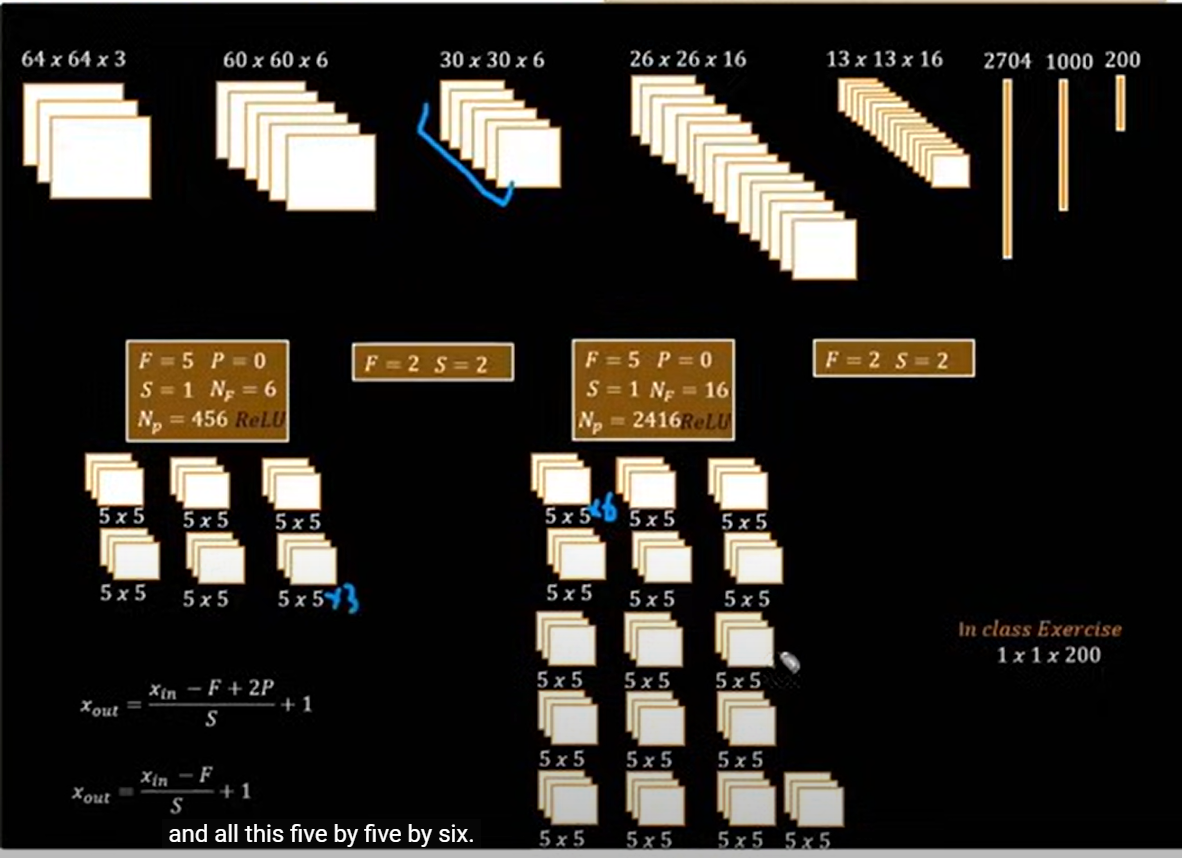

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 20, verbose = 1)
#needs a GPU it is too slow

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.6190 - loss: 0.6415 - val_accuracy: 0.4966 - val_loss: 0.8301
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.5841 - loss: 0.6727 - val_accuracy: 0.5829 - val_loss: 0.6915
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 45s 65ms/step - accuracy: 0.5912 - loss: 0.6690 - val_accuracy: 0.6011 - val_loss: 0.6600
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 45s 65ms/step - accuracy: 0.5920 - loss: 0.6660 - val_accuracy: 0.6098 - val_loss: 0.6666
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.5983 - loss: 0.6619 - val_accuracy: 0.4947 - val_loss: 0.7165
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.6192 - loss: 0.6433 - val_accuracy: 0.5332 - val_loss: 5.8427
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 87s 71ms/step - accuracy: 0.9154 - loss: 0.2446 - val_accuracy: 0.9252 - val_loss: 0.2765
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/step - accuracy: 0.9348 - loss: 0.2002 - 

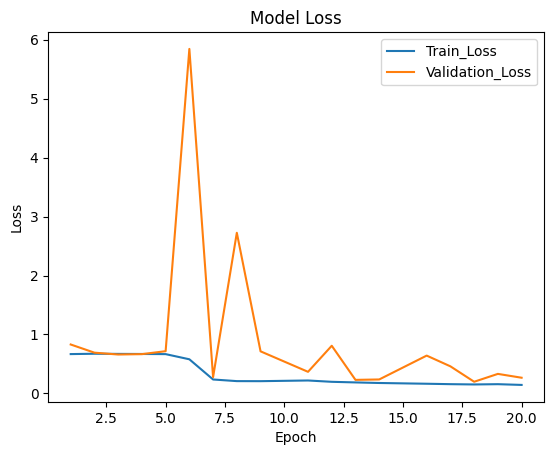

In [ ]:
# Copy the loss and val_loss data, excluding epochs 10 and 15
loss = [history.history['loss'][i] for i in range(len(history.history['loss'])) if i not in [9, 14]]
val_loss = [history.history['val_loss'][i] for i in range(len(history.history['val_loss'])) if i not in [9, 14]]

# Generate a list of epoch numbers, excluding 10 and 15
epochs = [i+1 for i in range(len(history.history['loss'])) if i not in [9, 14]]

# Plot the filtered data
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation_Loss'])
plt.show()

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
model.evaluate(test_dataset)

2757/2757 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9133 - loss: 0.2843


[0.29293811321258545, 0.9129488468170166]

In [ ]:
model.predict(test_dataset.take(1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


0.9852991

In [ ]:
def parasite_or_not(x):
    if x < 0.5:
      return str('p')
    else:
      return str('U')

In [ ]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


'U'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


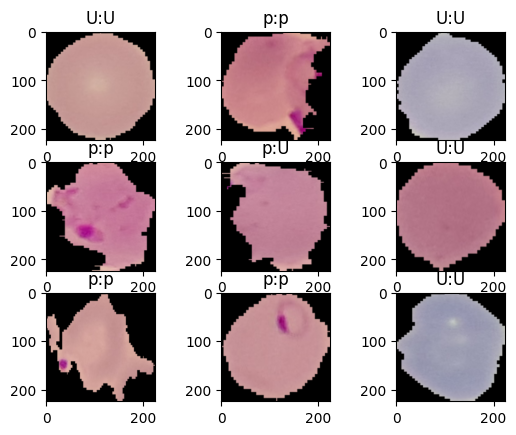

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))

# **Functional API**

In [ ]:
#feature extractor:
func_input = tf.keras.layers.Input(shape=(224, 224, 3), name = 'Input Image')

x = tf.keras.layers.Conv2D(filters = 6, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu')(func_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2)(x)
x = tf.keras.layers.Conv2D(filters = 16, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2)(x)

feature_extractor_model = Model(func_input, output, name = 'Feature_Extractor')
feature_extractor_model.summary()

Model: "Feature_Extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input Image (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 44 (176.00 B)

In [ ]:
#classifier:
func_input = tf.keras.layers.Input(shape=(224, 224, 3), name = 'Input Image')
x = feature_extractor_model(func_input)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

func_output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

lenet_model = Model(func_input, func_output, name = 'Lenet_Model')

lenet_model.summary()

Model: "Lenet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input Image (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Feature_Extractor (Functional)       │ (None, 54, 54, 16)          │           1,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [ ]:
lenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = lenet_model.fit(train_dataset, validation_data = val_dataset, epochs = 20, verbose = 1)
#same result so im not gonna train because it is time consuming

# **Sequential + Functional**

In [ ]:
feature_extractor_seq_model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
      tf.keras.layers.Conv2D(filters = 6, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

      tf.keras.layers.Conv2D(filters = 16, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2)
])
feature_extractor_seq_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)                   │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 44 (176.00 B)

In [ ]:
#classifier:
func_input = tf.keras.layers.Input(shape=(224, 224, 3), name = 'Input Image')
x = feature_extractor_seq_model(func_input)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

func_output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

lenet_model = Model(func_input, func_output, name = 'Lenet_Model')

lenet_model.summary()

Model: "Lenet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input Image (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 54, 54, 16)          │           1,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

# **Model Subclassing**

In [ ]:
class FeatureExtractor(tf.keras.Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(FeatureExtractor, self).__init__()

    self.conv_1 = tf.keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch_1 = tf.keras.layers.BatchNormalization()
    self.pool_1 = tf.keras.layers.MaxPool2D(pool_size = pool_size, strides = 2 * strides)

    self.conv_2 = tf.keras.layers.Conv2D(filters = filters * 2, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch_2 = tf.keras.layers.BatchNormalization()
    self.pool_2 = tf.keras.layers.MaxPool2D(pool_size = pool_size, strides = 2 * strides)

  def call(self, x):

    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)
    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

feature_sub_classed = FeatureExtractor(8, 3, 1, 'valid', 'relu', 2)

In [ ]:
func_input = tf.keras.layers.Input(shape=(224, 224, 3), name = 'Input Image')
x = feature_sub_classed(func_input)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

func_output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

lenet_model = Model(func_input, func_output, name = 'Lenet_Model')

lenet_model.summary()

Model: "Lenet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input Image (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feature_extractor_956                │ (None, 54, 54, 16)          │           1,488 │
│ (FeatureExtractor)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,649 (17.81 MB)

 Trainable params: 4,668,381 (17.81 MB)

 Non-trainable params: 268 (1.05 KB)

In [ ]:
class LenetModel(tf.keras.Model):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(LenetModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8, 3, 1, 'valid', 'relu', 2)
    self.flatten = tf.keras.layers.Flatten()
    self.dense_1 = tf.keras.layers.Dense(100, activation='relu')
    self.batch_1 = tf.keras.layers.BatchNormalization()
    self.dense_2 = tf.keras.layers.Dense(10, activation='relu')
    self.batch_2 = tf.keras.layers.BatchNormalization()
    self.dense_3 = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, x, training):

    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x

lenet_sub_classed = LenetModel()
lenet_sub_classed(tf.zeros([1,224,224,3]))
lenet_sub_classed.summary()

TypeError: LenetModel.__init__() missing 6 required positional arguments: 'filters', 'kernel_size', 'strides', 'padding', 'activation', and 'pool_size'

# **Custom Layers**

In [ ]:
class AhmadDense(tf.keras.Layer): #inheriting from the Layer class
  def __init__(self, output_units, activation):
    super(AhmadDense, self).__init__()
    self.output_units = output_units
    self.activation = activation

  def build(self, input_features_shape):
    self.w = self.add_weight(shape = (input_features_shape[-1], self.output_units),initializer = "random_normal", trainable = True)
    self.b = self.add_weight(shape = (1, self.output_units),initializer = "random_normal", trainable = True)

  def call(self, input_features):
    if(self.activation == "relu"):
      return tf.nn.relu(tf.matmul(input_features, self.w) + self.b)
    elif(self.activation == "sigmoid"):
      return tf.math.sigmoid(tf.matmul(input_features, self.w) + self.b)
    else:
      return tf.matmul(input_features, self.w) + self.b


In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
      tf.keras.layers.Conv2D(filters = 6, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

      tf.keras.layers.Conv2D(filters = 16, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

      tf.keras.layers.Flatten(),

      AhmadDense(100, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      AhmadDense(10, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      AhmadDense(1, activation='sigmoid')
  ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)                   │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ahmad_dense_6 (AhmadDense)           │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ahmad_dense_7 (AhmadDense)           │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ahmad_dense_8 (AhmadDense)           │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

#Precision, Recall, Accuracy and Confusion matrix

In [ ]:
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC

metrics = [TruePositives(name = 'tp'), FalsePositives(name = 'fp'), TrueNegatives(name = 'tn'), FalseNegatives(name = 'fn'),
           BinaryAccuracy(name = 'accuracy'), Precision(name = 'precision'), Recall(name = 'recall'), AUC(name = 'auc')]
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=metrics)

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = []
inp = []

for x, y in test_dataset.as_numpy_iterator():
  labels.append(y)
  inp.append(x)

print(labels)
labels = np.array([i[0] for i in labels])
print(labels)
print(np.array(inp).shape)
print(np.array(inp)[:, 0, ...].shape)

In [ ]:
predicted = model.predict(np.array(inp)[:, 0, ...])
print(predicted.shape)
print(predicted[:, 0].shape)
print(predicted[:, 0])

In [ ]:
threshold = 0.5
cm = confusion_matrix(labels, predicted > threshold)
print(cm)

In [ ]:
from sklearn.metrics import roc_curve

fp, tp, threshold = roc_curve(labels, predicted)
plt.plot(fp, tp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()

skip = 20
for i in range(0, len(threshold), skip):
  plt.text(fp[i], tp[i], threshold[i])
plt.show()

# **LossCallBack**
note that all the callbacks are but in the training (.fit)

In [ ]:
from tensorflow.keras.callbacks import Callback

class LossCallback(Callback):

  def on_epoch_end(self, epoch, logs):
    print('\nFor Epoch Number [] the model has a loss of {} '.format(epoch + 1, logs['loss']))

  def on_batch_end(self, batch, logs):
    print('\nFor Batch Number [] the model has a loss of {} '.format(batch + 1, logs['loss']))

# **CSVLogger**

In [ ]:
#logs the loss, accuracy, and other metrics (depending on your model configuration) at the end of each epoch during training
from tensorflow.keras.callbacks import CSVLogger

csv_callback = CSVLogger(
    filename = 'log.csv',
    separator = ',',
    append = False
)

# **Early Stopping**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True
)

# **Learning Rate Scheduling**

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

scheduler_callback = LearningRateScheduler(scheduler, verbose = 1)

#there are different kinds of learning rate scheduling you can check them on the internet

#ReduceLearningRateOnPlatea
from tensorflow.keras.callbacks import ReduceLROnPlateau
plateau_callback = ReduceLearningRateOnPlatea(
    monitor = 'val_accuracy', factor = 0.1, patience = 2, verbose = 1  #if the val_accuracy didnt increase after the 2 epochs we multiply the learning rate(0.01 by default) by the factor
)

# **Model Checkpointing**

In [ ]:
#to save the model or the model weights at some frequcy
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath = 'checkpoints/', monitor = 'val_loss', verbose = 1, save_best_only = False,   #we can monitor accuracy or any other things
    save_weights_only - False, mode = 'auto', save_freq = 'epoch'
)

# **Mitigating Overfitting and Un derfitting**

**Dropout**

In [ ]:
tf.keras.layers.Dropout(rate = 0.3, noise_shape=None, seed=None, **kwargs)

**regularizer**

In [ ]:
tf.keras.regularizers.L1(l1=0.01)
tf.keras.regularizers.L2(l2=0.01)
#i put them inside the Conv2D or Dense layers

# **Data Augmentation**

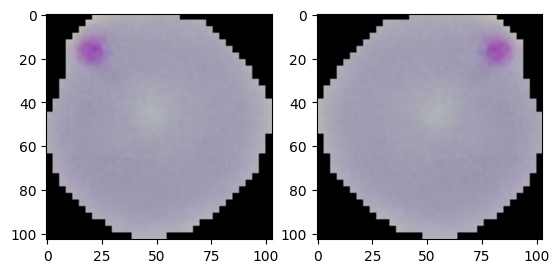

In [17]:
def visualize(original, augmented):
  plt.subplot(1, 2, 1) #(nb of rows, nb of columns, position of the image)
  plt.imshow(original)

  plt.subplot(1, 2, 2)
  plt.imshow(augmented)

original_image, label = next(iter(train_dataset))
augmented_image = tf.image.flip_left_right(original_image)
visualize(original_image, augmented_image)

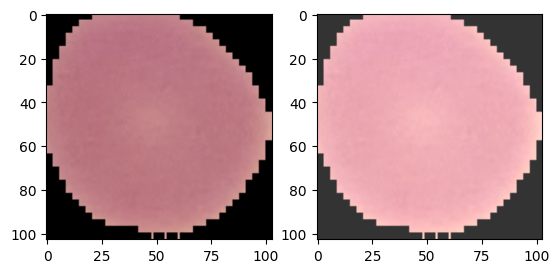

In [16]:
augmented_image = tf.image.adjust_brightness(original_image, delta = 0.2)
visualize(original_image, augmented_image)

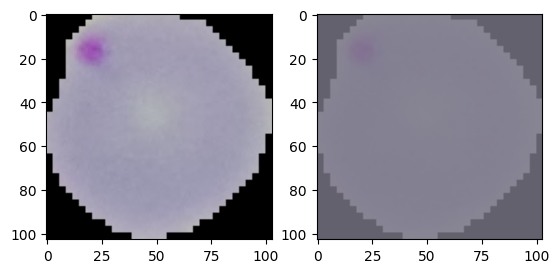

In [22]:
augmented_image = tf.image.adjust_contrast(original_image, contrast_factor = 0.2)
visualize(original_image, augmented_image)

**Augmentation with Albumentations**